<a href="https://colab.research.google.com/github/dpiresearch/ODSCWest2020_ReinforcementLearning/blob/main/06_DQN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CartPole-v0

A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.

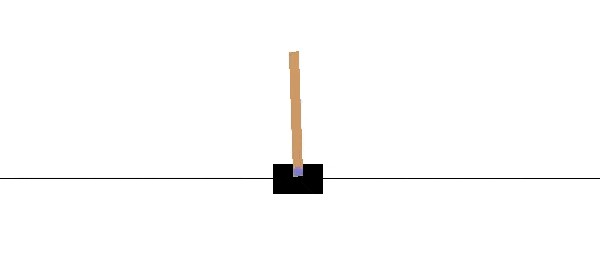

## Deep Q-Network

The intuition behind DQN is simple: the action space can be too big to be represented direclty, so why not create a Deep Neural network that associate the states (for example the pixel if playing an Atari game) to the action that will maximize the long term reward.

The reality is more comple than this, it's very easy to overfit this network.

Often times in reinforcement learning the error rate of the first few steps will be very large and may cause your parameters to oscillate. This is usually attributed to the lack of specificity of the deeper layers in your network. Thus we can come up with some schemes where the learning rate changes in a pre-determined way. For example we can use constant warm-up or gradual warm-up.

The convergence of stochastic gradient descent is a function of the learning rate and the batch size. When the batch size is increased too much then the needed increase in the learning rate can be such that it is beyond the possible curvature of the loss function. We thus introduce warm up as a means by which we can introduce large learning rates without the instability.


### Experience Replay

NN is easily overfitting especially when using rewards to choose the best action. If the DNN is overfitted, it’s hard to explore well the solution space. To solve this problem, Experience Replay stores the data necessary for the Q-matrix like state transitions, rewards and actions, and makes mini-batches to update neural networks. This technique expects the following merits.
reduces correlation between experiences in updating DNN
increases learning speed with mini-batches
reuses past transitions to avoid catastrophic forgetting



In [ ]:
!pip install rl

     |████████████████████████████████| 450kB 2.8MB/s 
  Created wheel for rl: filename=rl-3.0-cp36-cp36m-linux_x86_64.whl size=219897 sha256=e73e290ccaf550645ad7f16949e24e435d9bf27427e876987b4f2c606b37d4f0
  Stored in directory: /root/.cache/pip/wheels/dc/d0/1a/2ed0a4189404d84c70096954f926ad799a97cdd18f0e3bb7b1
Successfully built rl


In [ ]:
# Note: if you want tto visualize and you are running it in a jupyther notebook
# you can change this parameter
# It will not work on goolge colab

visualize = False

import numpy as np
import gym

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

import tensorflow as tf

tf.compat.v1.disable_eager_execution()

ENV_NAME = 'CartPole-v0'


# Get the environment and extract the number of actions.
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

# Next, we build a very simple model.
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(# complite here))
model.add(Activation(# complite here))
# try to Add a couple of layers
model.add(Dense(# complite here))
model.add(Activation('linear'))
print(model.summary())


# Finally, we configure and compile our agent. You can use every built-in 
# tensorflow.keras optimizer and the metrics
memory = SequentialMemory(limit=50000, window_length=1)
policy = BoltzmannQPolicy()
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
               target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

# We visualize the training here for show, but this
# slows down training quite a lot. You can always safely abort the training prematurely using
# Ctrl + C.
dqn.fit(env, nb_steps=5000, visualize=visualize, verbose=3)

# After training is done, we save the final weights.
dqn.save_weights('dqn_{}_weights.h5f'.format(ENV_NAME), overwrite=True)

# Finally, evaluate our algorithm for 5 episodes.
dqn.test(env, nb_episodes=5, visualize=visualize)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                80        
_________________________________________________________________
activation_6 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
activation_7 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 16)                272       
_________________________________________________________________
activation_8 (Activation)    (None, 16)               

/usr/local/lib/python3.6/dist-packages/rl/memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   26/5000: episode: 1, duration: 1.288s, episode steps:  26, steps per second:  20, episode reward: 26.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.538 [0.000, 1.000],  loss: 0.468186, mae: 0.501078, mean_q: 0.052419


/usr/local/lib/python3.6/dist-packages/rl/memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   60/5000: episode: 2, duration: 0.274s, episode steps:  34, steps per second: 124, episode reward: 34.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.618 [0.000, 1.000],  loss: 0.295219, mae: 0.531179, mean_q: 0.353702
   79/5000: episode: 3, duration: 0.156s, episode steps:  19, steps per second: 122, episode reward: 19.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.579 [0.000, 1.000],  loss: 0.095925, mae: 0.637626, mean_q: 1.012646
   95/5000: episode: 4, duration: 0.138s, episode steps:  16, steps per second: 116, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.375 [0.000, 1.000],  loss: 0.069697, mae: 0.697953, mean_q: 1.180735
  107/5000: episode: 5, duration: 0.103s, episode steps:  12, steps per second: 116, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.667 [0.000, 1.000],  loss: 0.051022, mae: 0.725897, mean_q: 1.273530
  121/5000: episode: 6, duration: 0.120s, episode steps:  14, steps per seco

.

## Fixed Target Network

Looking at the Q-learning algorithm we see that the Q is used twice, one with the state at time t and one at the next time step. The error is therefore calculated using network parameters that changes quickly and is likely to make our loss function instable. The Fixed Target Network trick will fix the parameters of the network for a certain ammount of steps (for example every 1000 steps), so we are not chasing a moving target


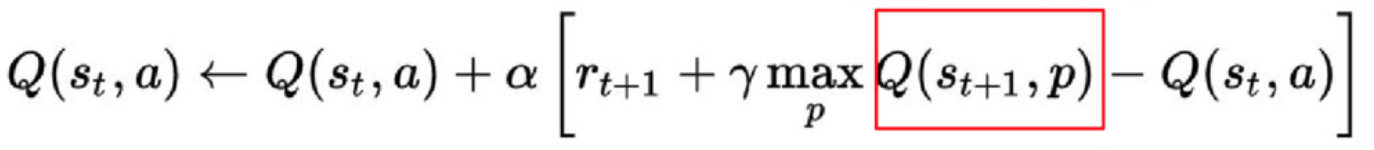

